In [14]:
%run scatter_tests_functions.ipynb
from sklearn.decomposition import PCA

Loading BokehJS ...

In [15]:
df = PandasTools.LoadSDF('training.sdf')
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in df.ROMol ]

np_fps = []
for fp in fps:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    np_fps.append(arr)
    
y =  df.activity.values
pca = PCA(n_components=2, random_state=42)
pca_fps = pca.fit_transform(np_fps)
#Create df with PCA components
pca_df = pd.DataFrame(pca_fps, columns=["pc1","pc2"])
#Add mol info columns to pca_df
pca_df["mol"],pca_df["name"], pca_df["activity"] = df.ROMol,df.name, df.activity
pca_df.dropna(axis = 0, inplace= True)
pca_df.reset_index(drop=True, inplace=True)

,pc1,pc2,mol,name,activity
0,-0.650901,0.900500,,Zimelidine,1
1,2.789622,0.631261,,trospectomycin sulfate,1

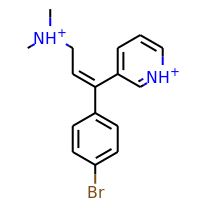
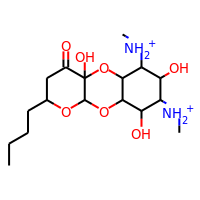

In [16]:
pca_df.head(2)

In [17]:
scatter_mol(pca_df, 'pc1', 'pc2')